In [1]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime

import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from market.market_data import MarketData
mkt = MarketData()

C:\Anaconda3\envs\finance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [2]:
from porfolio.portfolio import PortFolio

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [3]:
portfolio_assets = {
    'BTC': 0.007,
    'ETH': 2.14081,
    'XRP': 922.5,
    'ADA': 926,
    'XLM': 929.07,
    'LTC': 1.0,
    'TRX': 2760,
    'UBQ': 18.222,
    'BIS': 36.6,
    'IOTA': 47.553,
    'EMC2': 45,
    'FUN': 633.366,
    'ADST': 136.71
}

new_portfolio_assets = {
    'BTC': 0.007,
    'ETH': 2.14081,
    'XRP': 922.5,
    'ADA': 926,
    'XLM': 929.07,
    'LTC': 1.0,
    'TRX': 2760,
    'UBQ': 18.222,
    'BIS': 36.6,
    'IOTA': 47.553,
    'EMC2': 45,
    'FUN': 633.366,
    'ADST': 136.71,
    'XMR': 0,
    'DASH': 0,
}

assets_effective_price = {
    'BTC': 0.1,
    'ETH': 454.96,
    'XRP': 0.772,
    'ADA': 0.404,
    'XLM': 0.378,
    'LTC': 208.23,
    'TRX': 0.0668,
    'UBQ': 5.7,
    'BIS': 3.48,
    'IOTA': 3.08,
    'EMC2': 0.769,
    'FUN': 0.0897,
    'ADST': 0.817   
}

In [4]:
import pylab as plt
import seaborn as sns
from pprint import pprint

sns.set()

myportfolio = PortFolio(
    name= 'PedroPortfolio'
    )

Loaded portfolio database from C:\projects\finances.git\finances\porfolio\PedroPortfolio\assets_allocation_data.csv


# Portfolio Comparison

In [5]:
myportfolio.assets_data

,ADA,ADST,BCH,BIS,BTC,DASH,EMC2,ETH,FUN,IOTA,LTC,NEO,TRX,UBQ,XLM,XMR,XRP
2018-01-01,926.000,136.71,0.0,36.600000,0.007000,0.000000,45.0,2.14081,633.366,47.553,1.0,0.00,2760.000,18.222000,929.07,0.00000,922.5
2018-02-06,0.073,136.71,0.0,36.592335,0.080743,0.286593,45.0,2.14081,2550.366,47.553,1.5,2.04,0.237,18.222222,279.07,1.32867,130.0


## Optimize the portfolio continuously

In [6]:
update_frequency = 7

start_date = datetime.datetime(2017,10,3)
time_delta = datetime.timedelta(days=update_frequency)
end_date = datetime.datetime.now()
time = start_date
value = 100

optimized_pfl = PortFolio()
optimized_pfl.assets = new_portfolio_assets

while time<end_date:
    optimal_df = optimized_pfl.optimize_allocation(
        target_return=0.1,
        projection_steps=update_frequency,
        date=time, value_to_invest=value)
    optimal_assets = optimal_df['coin_quantities'].to_dict()
    optimized_pfl.insert_assets_at_date(assets=optimal_assets, date=time)
    time+=time_delta
    optimized_pfl.update_data()
    value=optimized_pfl.values_data.loc[:time]['TOTAL'].iloc[-1]
optimized_pfl.assets_data

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


,ADA,ADST,BIS,BTC,DASH,EMC2,ETH,FUN,IOTA,LTC,TRX,UBQ,XLM,XMR,XRP
2017-10-03,405.342536,38.825629,5.672707,0.001963,0.045930,62.436996,0.050232,127.665987,15.426388,0.164179,1988.462978,0.000000,638.256729,0.107944,58.839522
2017-10-10,195.360406,31.028069,10.296905,0.001993,0.037114,0.000000,0.084041,355.887284,13.253943,0.000000,2290.554990,4.983819,589.144847,0.155607,28.884512
2017-10-17,189.394646,48.331072,13.364871,0.001976,0.044225,50.146076,0.048422,313.997635,23.283116,0.238946,3781.148734,5.461637,205.493055,0.117707,33.470007
2017-10-24,297.325262,28.743501,0.000000,0.002531,0.025775,82.911229,0.079655,0.000000,20.159266,0.077835,2340.314251,11.971113,346.970760,0.062882,67.603908
2017-10-31,215.560953,61.360742,15.714510,0.002644,0.041032,66.064176,0.029051,548.895933,11.343039,0.245200,2078.830717,6.417879,281.261633,0.102862,33.078661
2017-11-07,308.338641,56.268352,0.000000,0.002167,0.028711,0.000000,0.080226,365.608714,23.664610,0.148514,4293.187179,4.571839,319.789049,0.118882,32.906219
2017-11-14,296.059051,43.110817,32.609257,0.001831,0.024264,43.222044,0.048105,551.736681,12.618577,0.116773,0.000000,10.746865,299.819150,0.143384,65.120881
2017-11-21,307.401433,0.000000,18.649180,0.002332,0.022709,0.000000,0.086951,693.275684,18.392094,0.237272,3049.729145,7.002874,455.790358,0.117173,0.000000
2017-11-28,0.000000,67.381752,20.775287,0.003250,0.057130,0.000000,0.081951,0.000000,10.220883,0.272375,6922.372811,0.000000,281.158601,0.207989,70.246918
2017-12-05,177.456500,102.458305,11.411110,0.001992,0.032609,20.866540,0.100679,0.000000,4.026965,0.336173,0.000000,0.000000,295.258662,0.175483,154.820158


### optimize only at the beginning

In [7]:
optimized_once_pfl = PortFolio()
optimized_once_pfl.assets = new_portfolio_assets

optimal_df = optimized_once_pfl.optimize_allocation(target_return=0.25, projection_steps=100, date=start_date, value_to_invest=100)
optimal_assets = optimal_df['coin_quantities'].to_dict()
optimized_once_pfl.insert_assets_at_date(assets=optimal_assets, date=start_date)

,ADA,ADST,BIS,BTC,DASH,EMC2,ETH,FUN,IOTA,LTC,TRX,UBQ,XLM,XMR,XRP
2017-10-03,365.576889,0.0,4.447284,0.005385,0.032618,0.0,0.06475,260.773061,0.0,0.204727,2533.491341,3.559891,867.72972,0.131848,0.0


### real one

In [8]:
myportfolio.insert_assets_at_date(assets=portfolio_assets, date=start_date)
myportfolio.update_data()

### compare

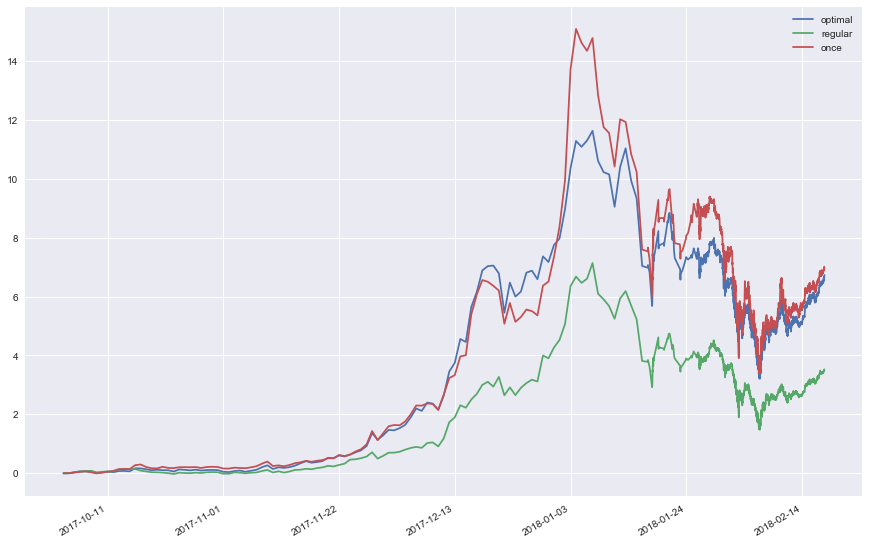

In [9]:
fig = plt.figure(figsize=(15,10))

optimized_pfl.relative_variation_since(start_date=start_date)['TOTAL'].plot(label='optimal')
myportfolio.relative_variation_since(start_date=start_date)['TOTAL'].plot(label='regular')
optimized_once_pfl.relative_variation_since(start_date=start_date)['TOTAL'].plot(label='once')
plt.legend()

In [10]:
print(optimized_pfl.relative_variation_since(start_date=start_date)['TOTAL'].iloc[-1])
print(myportfolio.relative_variation_since(start_date=start_date)['TOTAL'].iloc[-1])
print(optimized_once_pfl.relative_variation_since(start_date=start_date)['TOTAL'].iloc[-1])

6.7326197604
3.52800643075
7.0102139916
